# Logistic Regression from Scratch

## Simple 2-Dimensional Data for Easy Visualization

#### Author: Victor Nascimento Ribeiro - January 2024

For a detailed explanation of the functions, please refer to the `logistic_regression.py` file.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from logistic_regression import logistic_regression
%matplotlib inline

### Plotting function

In [2]:
def show_graph(X, y, w=None, line=False, title=None):
    # plot points
    plt.figure(figsize=(10,6))
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.scatter(X[:,0], X[:,1], c=color)
    plt.tight_layout()
    plt.title(title)
    
    #plot line
    if w is not None:
        xtar = np.arange(-10,10,0.1)
        plt.plot(xtar, (-w[0] - w[1]*xtar) / w[2]) # w0 + w1x + w2y = 0
    plt.show()

## Creating a random non-linearly separable training set - 2D

- Our training set consist in N radom points in $(x_1,x_2) \in [-10, 10] \times [-10, 10] \subseteq R^2$ region

- Let us fix a function $f(x) = 4 sin(x)\;$

- let's decide which class each point belongs to using $f(x)$: </br > 
  - if $x_2 > f(x_1)$ then the point is above $f$, so it belongs to <font color="blue">blues</font>
  - otherwise the point is below $f$, so it belongs to <font color="red">reds</font>

In [3]:
N = 100  # number of points

# Creating random data
x1 = np.random.randint(-10, 10, N)
x2 = np.random.randint(-10, 10, N)

X = np.column_stack((x1, x2))
y = np.ones(N)

# Assign labels
condition = x2 > 4 * np.sin(x1)
color = np.where(condition, 'b', 'r')
y[~condition] = 0 # {0,1} interpretation

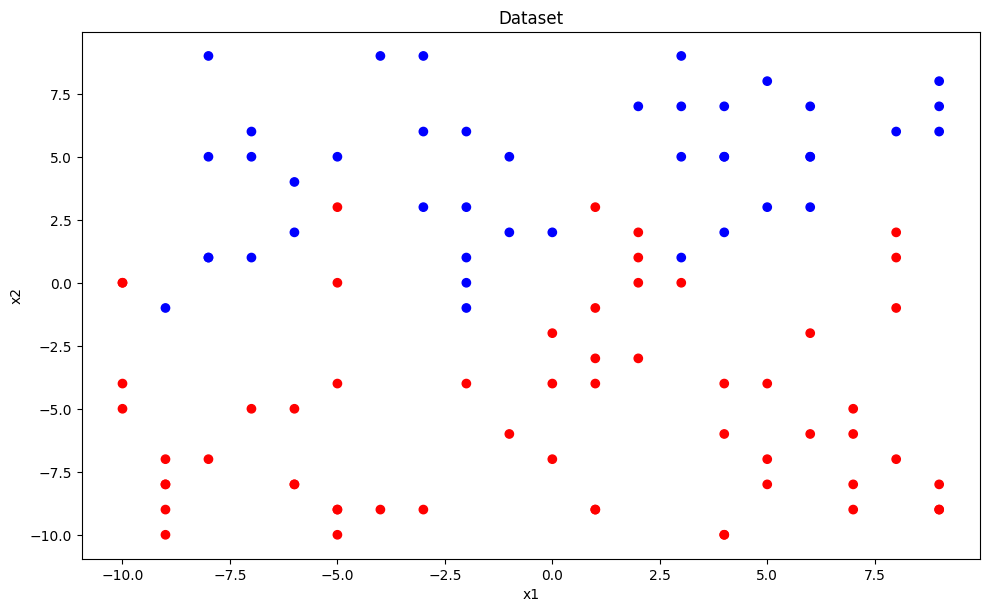

In [4]:
show_graph(X, y, title='Dataset')

# Training

In [5]:
model = logistic_regression()

In [6]:
model.fit(X, y, lr=0.002, epochs=5000)

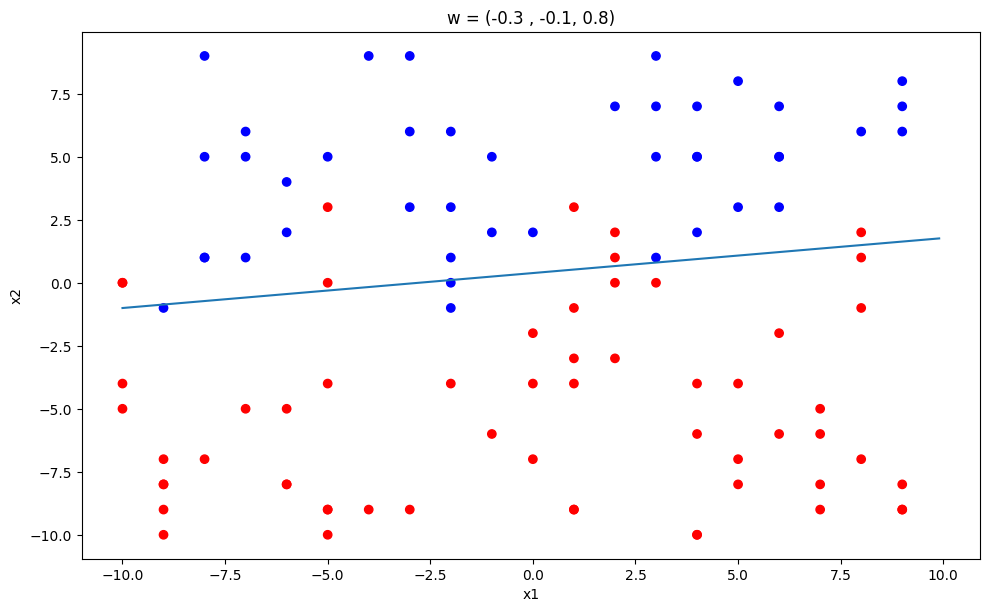

In [7]:
show_graph(X, y, model.w, title="w = (%.1f , %.1f, %.1f)" % (model.w[0], model.w[1], model.w[2]))

In [8]:
loss_history = model.loss_history

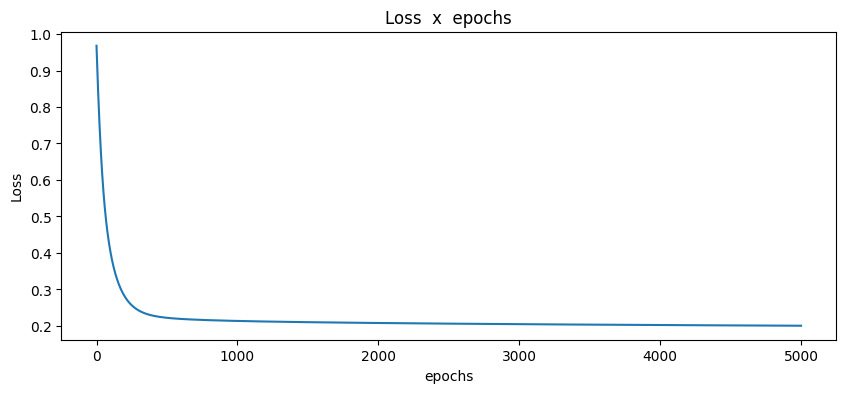

In [9]:
# plot loss
plt.figure(figsize=(10, 4))
plt.plot(loss_history)
plt.title("Loss  x  epochs")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.show()

# Testing

- Create 10 random samples

In [10]:
N_test = 10  # number of points

# Creating random data
x1_test = np.random.randint(-10, 10, N_test)
x2_test = np.random.randint(-10, 10, N_test)

X_test = np.column_stack((x1_test, x2_test))
y_test = np.ones(N_test)

# Assign labels
condition = x2_test > 4 * np.sin(x1_test)
colors = np.where(condition, 'b', 'r')
y_test[~condition] = 0 # {0,1} interpretation

### Evaluate

In [11]:
acc = model.evaluate(X_test, y_test)
print('Accuracy: ', acc)

Accuracy:  0.8


### Predict

In [12]:
point = np.array([3, -8])
point = np.reshape(point, (1,-1))

pred = model.predict(point)
cor = 'red' if pred == False else 'blue'

print(f'prediction for {point[0]} is {pred} {cor}')

prediction for [ 3 -8] is [False] red


## References

 - https://work.caltech.edu/telecourse (lecture 3)
 - Abu-Mostafa, Yaser S., Magdon-Ismail, Malik and Lin, Hsuan-Tien. Learning From Data. : AMLBook, 2012.